## PART ONE: Data Wrangling

In [1]:
# Iporting packages and modules
import numpy as np
import pandas as pd
import sqlite3 as lite
from os import path
import matplotlib.pyplot as plt

In [2]:
sqlite_file = 'lahman2014.sqlite'

connection = lite.connect(sqlite_file)

# Create a query to calculate the total salary for each team in a particular year and then display the year and team id
salary_query = "select yearID,teamID,salary, sum(salary) as totalPayroll from Salaries group by teamID,yearID order by teamID"
# Read SQL query or database table into a DataFrame.
team_salaries = pd.read_sql(salary_query, connection)
# Create a query to calculate the winnig percentage for each team in a particular year and then display the year and team id
winning_query = "select teamID, yearID, 100*Cast(W AS float)/G as Winning_Percentage from Teams"
# Read SQL query or database table into a DataFrame.
team_wins = pd.read_sql(winning_query, connection)
# Merging the two dataframes 
salary_win = pd.merge(team_salaries, team_wins, how = 'inner', left_on=["yearID",'teamID'], right_on=["yearID",'teamID'])
# Display the dataframe
salary_win[0:50]

,yearID,teamID,salary,totalPayroll,Winning_Percentage
0,1997,ANA,650000.0,31135472.0,51.851852
1,1998,ANA,1500000.0,41281000.0,52.469136
2,1999,ANA,2200000.0,55388166.0,43.209877
3,2000,ANA,3250000.0,51464167.0,50.617284
4,2001,ANA,4500000.0,47535167.0,46.296296
5,2002,ANA,5000000.0,61721667.0,61.111111
6,2003,ANA,5350000.0,79031667.0,47.530864
7,2004,ANA,6200000.0,100534667.0,56.790123
8,1998,ARI,210000.0,32347000.0,40.123457
9,1999,ARI,1800000.0,68703999.0,61.728395


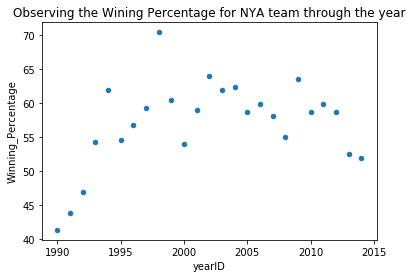

In [3]:
Winning_Percentage_NYA = salary_win.copy()
Winning_Percentage_NYA = Winning_Percentage_NYA[(Winning_Percentage_NYA['teamID'] == "NYA")]
Winning_Percentage_NYA = Winning_Percentage_NYA[(Winning_Percentage_NYA['yearID'] >= 1990)]
ax = Winning_Percentage_NYA.reset_index().plot(kind='scatter', x='yearID', y='Winning_Percentage',
                                        title='Observing the Wining Percentage for NYA team through the year')

<function matplotlib.pyplot.show(*args, **kw)>

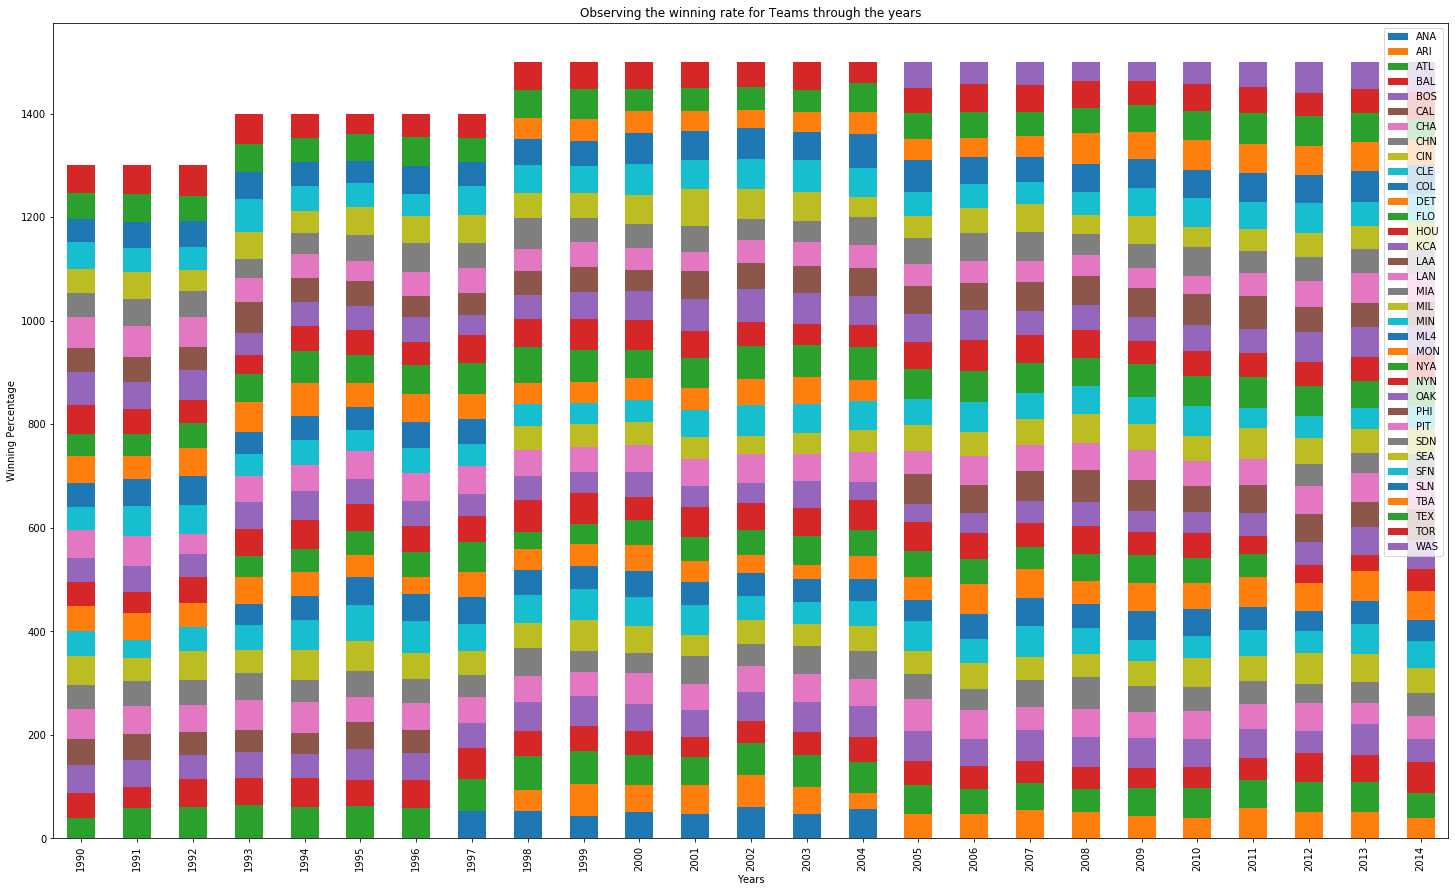

In [4]:
fig, ax = plt.subplots(figsize=(25,15))
win_year = salary_win.copy()
win_year = win_year[win_year.yearID >= 1990]
win_year = win_year.pivot(index = 'yearID', columns = 'teamID', values = 'Winning_Percentage')
ax = win_year.plot(kind='bar',title='Observing the winning rate for Teams through the years', stacked = True, ax=ax)
ax.set(xlabel="Years", ylabel= "Winning Percentage")
plt.legend(loc='upper right')
plt.show

## PART TWO: Exploratory Data Analysis

### Payroll distribution over years' from 1990 to 2014

<function matplotlib.pyplot.show(*args, **kw)>

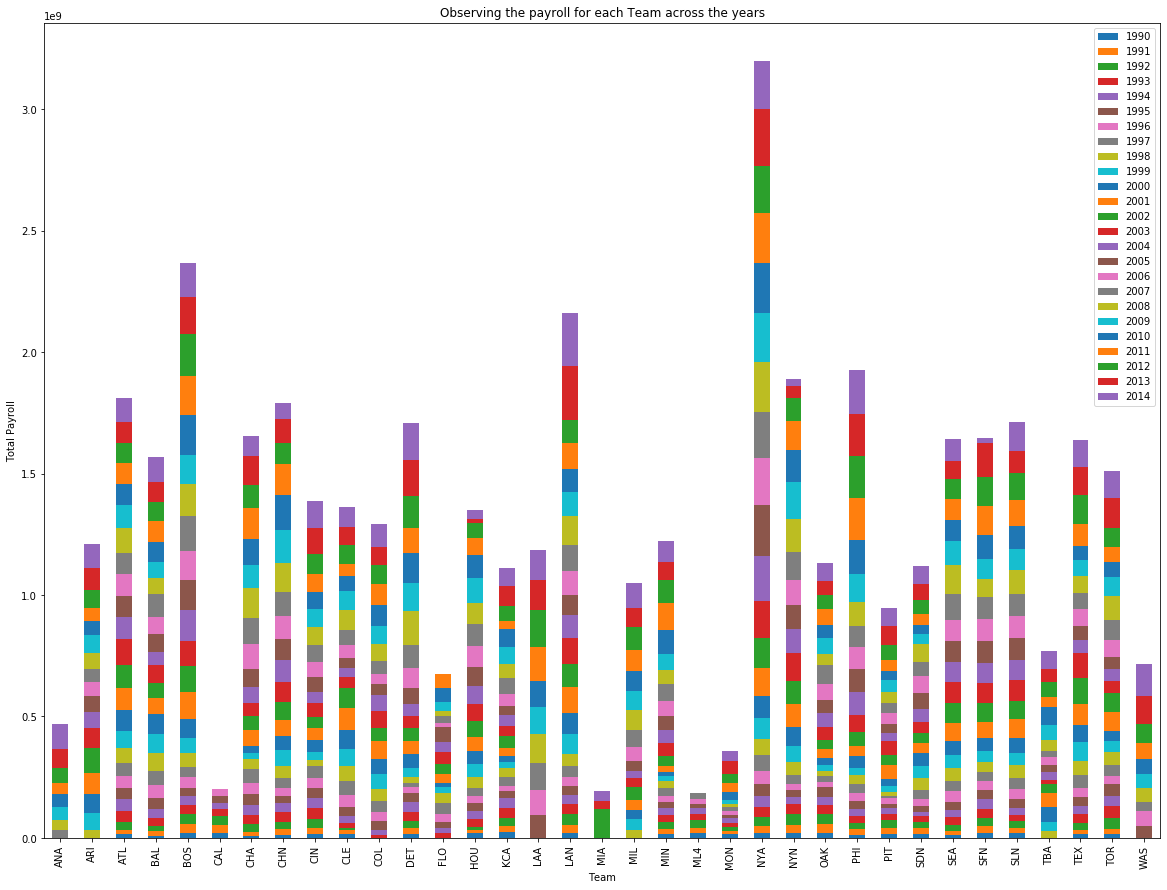

In [5]:
### Part 2 'Payroll distribution over years' from 1990 to 2014:
fig, ax = plt.subplots(figsize=(20,15))
# take a copy from team salaries dataframe
salary_win_new = salary_win.copy()
salary_win_new = salary_win_new[salary_win_new.yearID >= 1990]
salary_win_new = salary_win_new.pivot(index = 'teamID', columns = 'yearID', values = 'totalPayroll')
ax = salary_win_new.plot(kind='bar',title='Observing the payroll for each Team across the years', stacked = True, ax=ax)
plt.legend(loc='upper right')
ax.set(xlabel="Team", ylabel= "Total Payroll")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

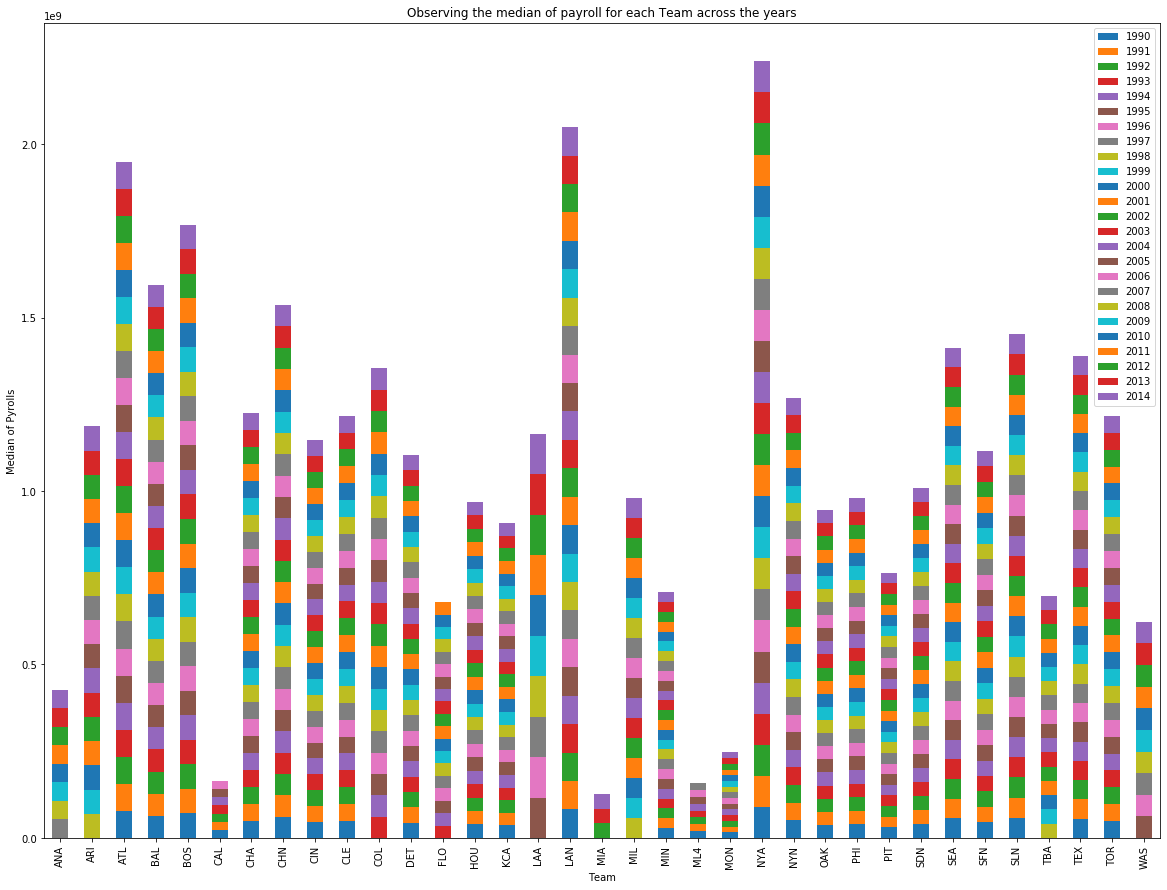

In [6]:
### Part 2 'Payroll distribution over years' from 1990 to 2014:
fig, ax = plt.subplots(figsize=(20,15))
# take a copy from team salaries dataframe
median_for_each_team = salary_win.copy()
median_for_each_team['Median_Payroll'] = median_for_each_team['totalPayroll'].groupby(median_for_each_team['teamID']).transform('median')
median_for_each_team = median_for_each_team[median_for_each_team.yearID >= 1990]
median_for_each_team = median_for_each_team.pivot(index = 'teamID', columns = 'yearID', values = 'Median_Payroll')
ax = median_for_each_team.plot(kind='bar',title='Observing the median of payroll for each Team across the years', stacked = True, ax=ax)
plt.legend(loc='upper right')
ax.set(xlabel="Team", ylabel= "Median of Pyrolls")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

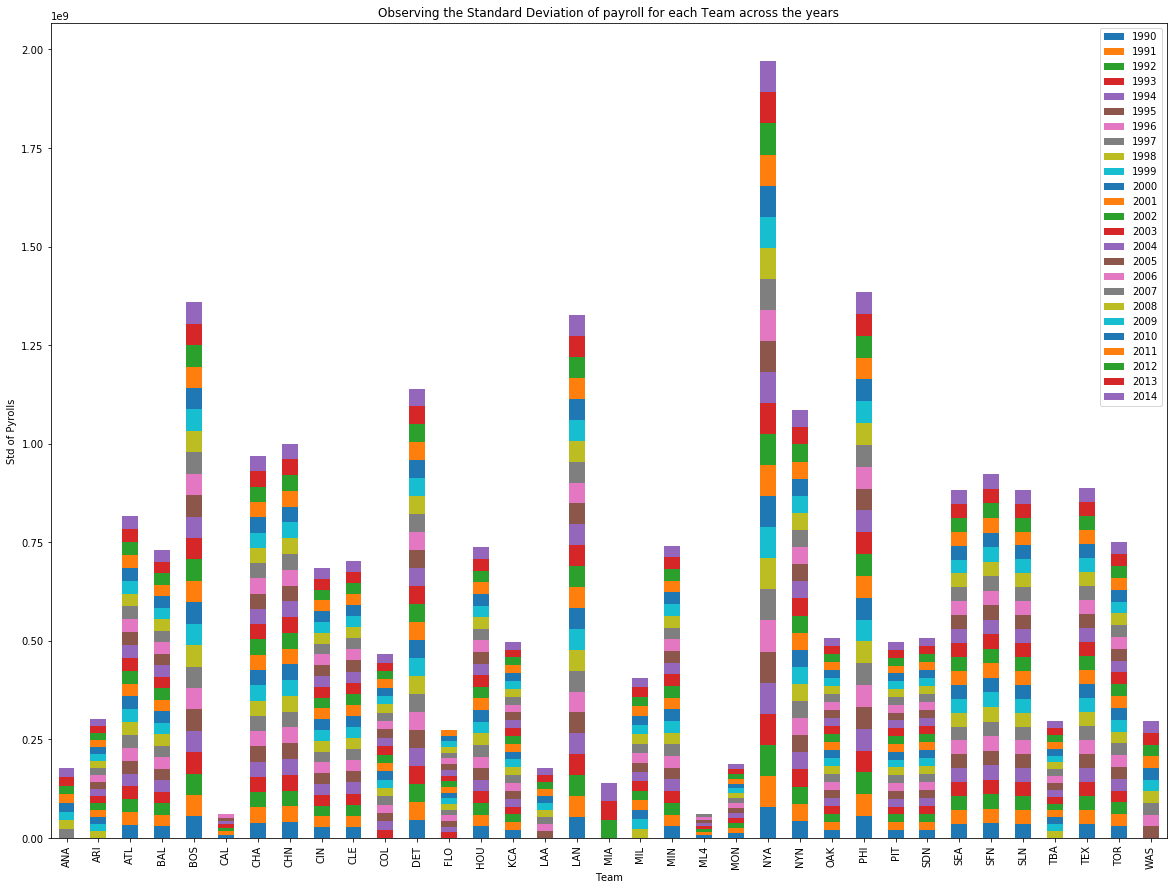

In [7]:
### Part 2 'Payroll distribution over years' from 1990 to 2014:
fig, ax = plt.subplots(figsize=(20,15))
# take a copy from team salaries dataframe
std_for_each_team = salary_win.copy()
std_for_each_team['Std_of_Payroll'] = std_for_each_team['totalPayroll'].groupby(std_for_each_team['teamID']).transform('std')
std_for_each_team = std_for_each_team[std_for_each_team.yearID >= 1990]
std_for_each_team = std_for_each_team.pivot(index = 'teamID', columns = 'yearID', values = 'Std_of_Payroll')
ax = std_for_each_team.plot(kind='bar',title='Observing the Standard Deviation of payroll for each Team across the years', stacked = True, ax=ax)
plt.legend(loc='upper right')
ax.set(xlabel="Team", ylabel= "Std of Pyrolls")
plt.show

### Correlation between mean payroll and winning percentage

### Time Period 1

In [8]:
twp_1 = salary_win.copy()
# Extracting a specific rows only for time periods
twp_1 = twp_1[(twp_1['yearID'] <= 1995) & (twp_1['yearID'] >= 1990)]  
#Calculating the Mean of the total salary and winnig percentage for each category
twp_1['Mean_Payroll'] = twp_1['totalPayroll'].groupby(twp_1['teamID']).transform('mean')
twp_1['Mean_WinningPercentage'] = twp_1['Winning_Percentage'].groupby(twp_1['teamID']).transform('mean')
# Dropping the total payroll tabe as we dont need it
twp_1 = twp_1[['teamID', 'Mean_Payroll','Mean_WinningPercentage']]
# Displaying the Mean of the Payrolls

twp_1.drop_duplicates(subset = 'teamID', keep = 'first', inplace = True)
# Reseting index to zero, so no error will occur when merging two different dataframes
twp_1.reset_index(drop=True, inplace=True)
twp_1

,teamID,Mean_Payroll,Mean_WinningPercentage
0,ATL,3.430745e+07,57.498105
1,BAL,2.714476e+07,50.254326
2,BOS,3.446193e+07,51.216005
3,CAL,2.908284e+07,47.052832
4,CHA,3.040221e+07,54.838016
5,CHN,2.863486e+07,48.232505
6,CIN,3.426550e+07,53.148036
7,CLE,2.141406e+07,50.732456
8,COL,2.279852e+07,46.709797
9,DET,3.089921e+07,47.856057


### Time Period 2

In [9]:
twp_2 = salary_win.copy()
# Extracting a specific rows only for time periods
twp_2 = twp_2[(twp_2['yearID'] <= 2000) & (twp_2['yearID'] >= 1996)]  
#Calculating the Mean of the total salary and winnig percentage for each category
twp_2['Mean_Payroll'] = twp_2['totalPayroll'].groupby(twp_2['teamID']).transform('mean')
twp_2['Mean_WinningPercentage'] = twp_2['Winning_Percentage'].groupby(twp_2['teamID']).transform('mean')
# Dropping the total payroll tabe as we dont need it
twp_2 = twp_2[['teamID', 'Mean_Payroll','Mean_WinningPercentage']]

twp_2.drop_duplicates(subset = 'teamID', keep = 'first', inplace = True)
# Reseting index to zero, so no error will occur when merging two different dataframes
twp_2.reset_index(drop=True, inplace=True)
# Displaying the Means of the Teams
twp_2

,teamID,Mean_Payroll,Mean_WinningPercentage
0,ANA,4.481720e+07,49.537037
1,ARI,6.069294e+07,51.440329
2,ATL,6.416817e+07,61.851852
3,BAL,6.948313e+07,51.414830
4,BOS,5.682942e+07,53.580247
5,CAL,2.873800e+07,43.478261
6,CHA,3.959360e+07,51.235321
7,CHN,4.979133e+07,45.117019
8,CIN,3.922586e+07,51.097478
9,CLE,6.291384e+07,57.055441


### Time Period 3

In [10]:
twp_3 = salary_win.copy()
# Extracting a specific rows only for time periods
twp_3 = twp_3[(twp_3['yearID'] <= 2005) & (twp_3['yearID'] >= 2001)]  
#Calculating the Mean of the total salary and winnig percentage for each category
twp_3['Mean_Payroll'] = twp_3['totalPayroll'].groupby(twp_3['teamID']).transform('mean')
twp_3['Mean_WinningPercentage'] = twp_3['Winning_Percentage'].groupby(twp_3['teamID']).transform('mean')
# Dropping the total payroll tabe as we dont need it
twp_3 = twp_3[['teamID', 'Mean_Payroll','Mean_WinningPercentage']]
# Displaying the Mean of the Payrolls

twp_3.drop_duplicates(subset = 'teamID', keep = 'first', inplace = True)
# Reseting index to zero, so no error will occur when merging two different dataframes
twp_3.reset_index(drop=True, inplace=True)
twp_3

,teamID,Mean_Payroll,Mean_WinningPercentage
0,ANA,72205792.0,52.932099
1,ARI,80133982.8,49.629630
2,ATL,93538000.4,58.842880
3,BAL,65501638.6,43.526471
4,BOS,113830403.6,57.223372
5,CHA,62821400.0,53.333333
6,CHN,79573586.4,50.740741
7,CIN,52379978.0,44.636068
8,CLE,59293616.8,50.123457
9,COL,61771242.2,43.827160


### Time Period 4

In [11]:
twp_4 = salary_win.copy()
# Extracting a specific rows only for time periods
twp_4 = twp_4[(twp_4['yearID'] <= 2010) & (twp_4['yearID'] >= 2006)]  
#Calculating the Mean of the total salary and winnig percentage for each category
twp_4['Mean_Payroll'] = twp_4['totalPayroll'].groupby(twp_4['teamID']).transform('mean')
twp_4['Mean_WinningPercentage'] = twp_4['Winning_Percentage'].groupby(twp_4['teamID']).transform('mean')
# Dropping the total payroll tabe as we dont need it
twp_4 = twp_4[['teamID', 'Mean_Payroll','Mean_WinningPercentage']]
# Displaying the Mean of the Payrolls

twp_4.drop_duplicates(subset = 'teamID', keep = 'first', inplace = True)
# Reseting index to zero, so no error will occur when merging two different dataframes
twp_4.reset_index(drop=True, inplace=True)
twp_4

,teamID,Mean_Payroll,Mean_WinningPercentage
0,ARI,62357663.2,47.283951
1,ATL,92192644.8,50.864198
2,BAL,76334160.4,41.657082
3,BOS,136061881.0,56.913580
4,CHA,106842066.4,51.537529
5,CHN,118771732.8,50.261483
6,CIN,69774447.2,48.765432
7,CLE,67891593.0,48.024691
8,COL,64671500.0,51.166402
9,DET,110609700.8,52.280542


### Time Period 5

In [12]:
twp_5 = salary_win.copy()
# Extracting a specific rows only for time periods
twp_5 = twp_5[(twp_5['yearID'] <= 2014) & (twp_5['yearID'] >= 2011)]  
#Calculating the Mean of the total salary and winnig percentage for each category
twp_5['Mean_Payroll'] = twp_5['totalPayroll'].groupby(twp_5['teamID']).transform('mean')
twp_5['Mean_WinningPercentage'] = twp_5['Winning_Percentage'].groupby(twp_5['teamID']).transform('mean')
# Dropping the total payroll tabe as we dont need it
twp_5 = twp_5[['teamID', 'Mean_Payroll','Mean_WinningPercentage']]
# Displaying the Mean of the Payrolls

twp_5.drop_duplicates(subset = 'teamID', keep = 'first', inplace = True)
# Reseting index to zero, so no error will occur when merging two different dataframes
twp_5.reset_index(drop=True, inplace=True)
twp_5

,teamID,Mean_Payroll,Mean_WinningPercentage
0,ARI,7.885954e+07,49.382716
1,ATL,8.882829e+07,55.246914
2,BAL,8.761684e+07,52.932099
3,BOS,1.563748e+08,50.462963
4,CHA,1.066511e+08,46.296296
5,CHN,9.483365e+07,41.820988
6,CIN,9.319318e+07,52.777778
7,CLE,7.128264e+07,50.154321
8,COL,8.400755e+07,42.746914
9,DET,1.342113e+08,56.481481


### Plotting the Graph for the Five Time Periods

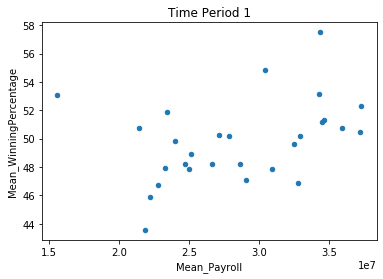

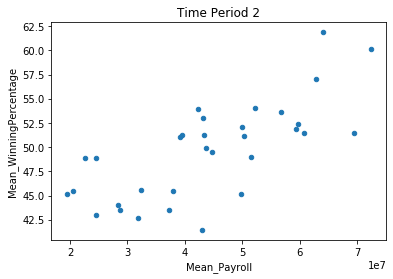

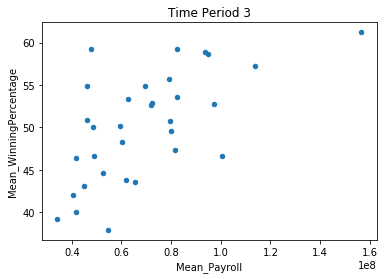

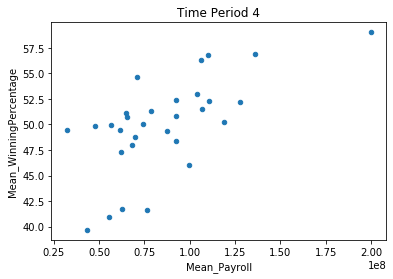

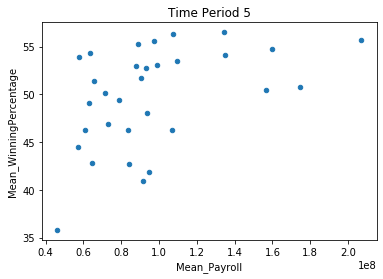

In [13]:
# This graph Illustrate how much the winning percentage differs according to the Payroll in all of the years 
ax = twp_1.reset_index().plot(kind='scatter', x='Mean_Payroll', y='Mean_WinningPercentage',
                                        title='Time Period 1')

ax = twp_2.reset_index().plot(kind='scatter', x='Mean_Payroll', y='Mean_WinningPercentage',
                                        title='Time Period 2')

ax = twp_3.reset_index().plot(kind='scatter', x='Mean_Payroll', y='Mean_WinningPercentage',
                                        title='Time Period 3')

ax = twp_4.reset_index().plot(kind='scatter', x='Mean_Payroll', y='Mean_WinningPercentage',
                                        title='Time Period 4')

ax = twp_5.reset_index().plot(kind='scatter', x='Mean_Payroll', y='Mean_WinningPercentage',
                                        title='Time Period 5')

### Description for the up graphs,
##### As it clear the payroll across different period is keeping in increasing, which means that from 1985 till 2014 the payroll for the teams are increasing 

### Are there any teams that stand out as being particularly good at paying for wins across these periods?
##### Yes, in Term Period 1 = SDN, Term Period 2 = MON, Term Period 3 = MIN, Term Period 4 = CCE, Term Period 5 = TOR

### What can you say about the Oakland A's spending efficiency across these periods
##### In Period 1 till Period 3 the more they spend the more the probability of winning increase, on the other hand m In Periods 4,5 the more they spend the more they loose

## PART THREE: Data Transformations

### Standardizing across years

In [14]:
SP = salary_win.copy()

SP ['Mean_Payroll'] = SP['totalPayroll'].groupby(SP['yearID']).transform('mean')
SP['standard'] = SP['totalPayroll'].groupby(SP['yearID']).transform('std')

SP['Standardizing_Payroll'] = (SP['totalPayroll']-SP['Mean_Payroll'])/SP['standard']
SP['Standardizing_Payroll'] = SP['Standardizing_Payroll']

SP[50:100]

,yearID,teamID,salary,totalPayroll,Winning_Percentage,Mean_Payroll,standard,Standardizing_Payroll
50,2010,ATL,3100000.0,84423666.0,56.172840,9.071200e+07,3.811503e+07,-0.164983
51,2011,ATL,416500.0,87002692.0,54.938272,9.281684e+07,4.081197e+07,-0.142462
52,2012,ATL,495000.0,82829942.0,58.024691,9.775804e+07,3.681754e+07,-0.405462
53,2013,ATL,491250.0,87871525.0,59.259259,1.011509e+08,4.883029e+07,-0.271949
54,2014,ATL,517500.0,97609000.0,48.765432,9.980002e+07,4.570505e+07,-0.047938
55,1985,BAL,625000.0,11560712.0,51.552795,1.007557e+07,2.470845e+06,0.601068
56,1986,BAL,600000.0,13001258.0,45.061728,1.184056e+07,3.186956e+06,0.364203
57,1987,BAL,625000.0,13900273.0,41.358025,1.048367e+07,3.848337e+06,0.887813
58,1988,BAL,675000.0,13532075.0,33.540373,1.155586e+07,3.386331e+06,0.583585
59,1989,BAL,97000.0,8275167.0,53.703704,1.384599e+07,3.568844e+06,-1.560960


In [15]:
tws_1 = SP.copy()
# Extracting a specific rows only for time periods
tws_1 = tws_1[(tws_1['yearID'] <= 1995) & (tws_1['yearID'] >= 1990)]  
# Calculating the mean Standardizing_Payroll and Winning_Percentage
tws_1['Mean_Standardizing_Payroll'] = tws_1['Standardizing_Payroll'].groupby(tws_1['teamID']).transform('mean')
tws_1['Mean_WinningPercentage'] = tws_1['Winning_Percentage'].groupby(tws_1['teamID']).transform('mean')
# Selecting a specific coloumns from the SP dataframe
tws_1 = tws_1[['teamID', 'Mean_Standardizing_Payroll','Mean_WinningPercentage']]
# Dropping duplicate rows
tws_1.drop_duplicates(subset = 'teamID', keep = 'first', inplace = True)
# Reseting index to zero, so no error will occur when merging two different dataframes
tws_1.reset_index(drop=True, inplace=True)
# Displaying the Mean of the Payrolls
tws_1

,teamID,Mean_Standardizing_Payroll,Mean_WinningPercentage
0,ATL,0.551681,57.498105
1,BAL,-0.373053,50.254326
2,BOS,0.818282,51.216005
3,CAL,0.233270,47.052832
4,CHA,-0.028539,54.838016
5,CHN,-0.070851,48.232505
6,CIN,0.580007,53.148036
7,CLE,-0.879730,50.732456
8,COL,-1.144318,46.709797
9,DET,0.286375,47.856057


In [16]:
tws_2 = SP.copy()
# Extracting a specific rows only for time periods
tws_2 = tws_2[(tws_2['yearID'] <= 2000) & (tws_2['yearID'] >= 1996)]   

tws_2['Mean_Standardizing_Payroll'] = tws_2['Standardizing_Payroll'].groupby(tws_2['teamID']).transform('mean')
tws_2['Mean_WinningPercentage'] = tws_2['Winning_Percentage'].groupby(tws_2['teamID']).transform('mean')

tws_2 = tws_2[['teamID', 'Mean_Standardizing_Payroll','Mean_WinningPercentage']]
# Displaying the Mean of the Payrolls
tws_2.drop_duplicates(subset = 'teamID', keep = 'first', inplace = True)
# Reseting index to zero, so no error will occur when merging two different dataframes
tws_2.reset_index(drop=True, inplace=True)
tws_2

,teamID,Mean_Standardizing_Payroll,Mean_WinningPercentage
0,ANA,-0.175953,49.537037
1,ARI,0.480674,51.440329
2,ATL,1.213783,61.851852
3,BAL,1.587969,51.414830
4,BOS,0.730572,53.580247
5,CAL,-0.508955,43.478261
6,CHA,-0.045982,51.235321
7,CHN,0.284131,45.117019
8,CIN,-0.188211,51.097478
9,CLE,1.165852,57.055441


In [17]:
tws_3 = SP.copy()
# Extracting a specific rows only for time periods
tws_3 = tws_3[(tws_3['yearID'] <= 2005) & (tws_3['yearID'] >= 2001)]  

tws_3['Mean_Standardizing_Payroll'] = tws_3['Standardizing_Payroll'].groupby(tws_3['teamID']).transform('mean')
tws_3['Mean_WinningPercentage'] = tws_3['Winning_Percentage'].groupby(tws_3['teamID']).transform('mean')

tws_3 = tws_3[['teamID', 'Mean_Standardizing_Payroll','Mean_WinningPercentage']]

# Displaying the Mean of the Payrolls
tws_3.drop_duplicates(subset = 'teamID', keep = 'first', inplace = True)
# Reseting index to zero, so no error will occur when merging two different dataframes
tws_3.reset_index(drop=True, inplace=True)
tws_3

,teamID,Mean_Standardizing_Payroll,Mean_WinningPercentage
0,ANA,0.073705,52.932099
1,ARI,0.457806,49.629630
2,ATL,0.880888,58.842880
3,BAL,-0.117789,43.526471
4,BOS,1.550913,57.223372
5,CHA,-0.234483,53.333333
6,CHN,0.338754,50.740741
7,CIN,-0.598096,44.636068
8,CLE,-0.237489,50.123457
9,COL,-0.231588,43.827160


In [18]:
tws_4 = SP.copy()
# Extracting a specific rows only for time periods
tws_4 = tws_4[(tws_4['yearID'] <= 2010) & (tws_4['yearID'] >= 2006)] 

tws_4['Mean_Standardizing_Payroll'] = tws_4['Standardizing_Payroll'].groupby(tws_4['teamID']).transform('mean')
tws_4['Mean_WinningPercentage'] = tws_4['Winning_Percentage'].groupby(tws_4['teamID']).transform('mean')

tws_4 = tws_4[['teamID', 'Mean_Standardizing_Payroll','Mean_WinningPercentage']]

# Displaying the Mean of the Payrolls
tws_4.drop_duplicates(subset = 'teamID', keep = 'first', inplace = True)
# Reseting index to zero, so no error will occur when merging two different dataframes
tws_4.reset_index(drop=True, inplace=True)
tws_4

,teamID,Mean_Standardizing_Payroll,Mean_WinningPercentage
0,ARI,-0.662956,47.283951
1,ATL,0.188887,50.864198
2,BAL,-0.261146,41.657082
3,BOS,1.422234,56.913580
4,CHA,0.599523,51.537529
5,CHN,0.924173,50.261483
6,CIN,-0.455848,48.765432
7,CLE,-0.508846,48.024691
8,COL,-0.617037,51.166402
9,DET,0.683446,52.280542


In [19]:
tws_5 = SP.copy()
# Extracting a specific rows only for time periods
tws_5 = tws_5[(tws_5['yearID'] <= 2014) & (tws_5['yearID'] >= 2011)]  

tws_5['Mean_Standardizing_Payroll'] = tws_5['Standardizing_Payroll'].groupby(tws_5['teamID']).transform('mean')
tws_5['Mean_WinningPercentage'] = tws_5['Winning_Percentage'].groupby(tws_5['teamID']).transform('mean')

tws_5 = tws_5[['teamID', 'Mean_Standardizing_Payroll','Mean_WinningPercentage']]

# Displaying the Mean of the Payrolls
tws_5.drop_duplicates(subset = 'teamID', keep = 'first', inplace = True)
# Reseting index to zero, so no error will occur when merging two different dataframes
tws_5.reset_index(drop=True, inplace=True)
tws_5

,teamID,Mean_Standardizing_Payroll,Mean_WinningPercentage
0,ARI,-0.469650,49.382716
1,ATL,-0.216953,55.246914
2,BAL,-0.250585,52.932099
3,BOS,1.406972,50.462963
4,CHA,0.207080,46.296296
5,CHN,-0.057967,41.820988
6,CIN,-0.136017,52.777778
7,CLE,-0.627483,50.154321
8,COL,-0.323249,42.746914
9,DET,0.833237,56.481481


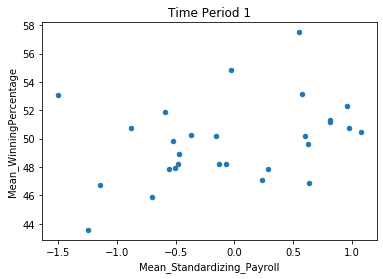

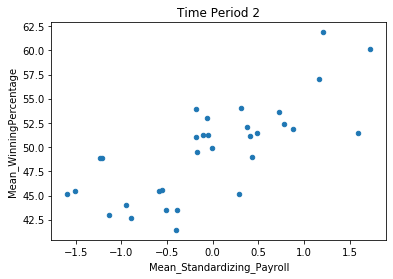

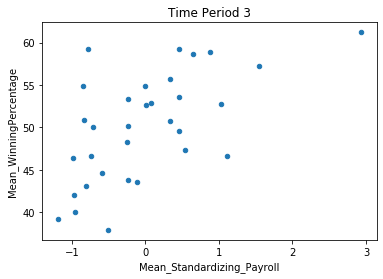

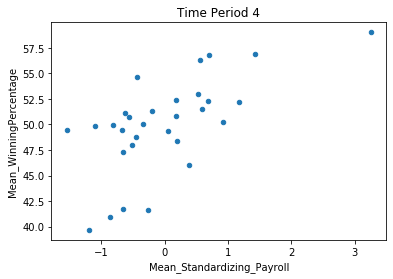

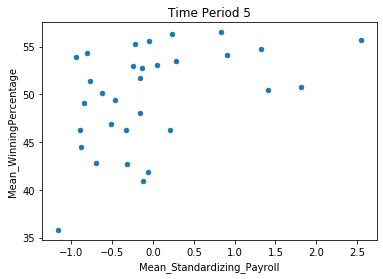

In [20]:
# This graph Illustrate how much the winning percentage differs according to the Payroll in all of the years 
ax = tws_1.reset_index().plot(kind='scatter', x='Mean_Standardizing_Payroll', y='Mean_WinningPercentage',
                                        title='Time Period 1')
ax = tws_2.reset_index().plot(kind='scatter', x='Mean_Standardizing_Payroll', y='Mean_WinningPercentage',
                                        title='Time Period 2')
ax = tws_3.reset_index().plot(kind='scatter', x='Mean_Standardizing_Payroll', y='Mean_WinningPercentage',
                                        title='Time Period 3')
ax = tws_4.reset_index().plot(kind='scatter', x='Mean_Standardizing_Payroll', y='Mean_WinningPercentage',
                                        title='Time Period 4')
ax = tws_5.reset_index().plot(kind='scatter', x='Mean_Standardizing_Payroll', y='Mean_WinningPercentage',
                                        title='Time Period 5')


## Expected Winning Percentage

In [21]:
EW = SP.copy()
EW ['Expected_Win'] = (50+2.5*EW ['Standardizing_Payroll'])
EW

,yearID,teamID,salary,totalPayroll,Winning_Percentage,Mean_Payroll,standard,Standardizing_Payroll,Expected_Win
0,1997,ANA,650000.0,31135472.0,51.851852,4.026021e+07,1.306073e+07,-0.698639,48.253402
1,1998,ANA,1500000.0,41281000.0,52.469136,4.260943e+07,1.538081e+07,-0.086369,49.784077
2,1999,ANA,2200000.0,55388166.0,43.209877,4.980762e+07,2.056133e+07,0.271410,50.678524
3,2000,ANA,3250000.0,51464167.0,50.617284,5.553784e+07,2.141622e+07,-0.190214,49.524464
4,2001,ANA,4500000.0,47535167.0,46.296296,6.535544e+07,2.470771e+07,-0.721244,48.196891
...,...,...,...,...,...,...,...,...,...
853,2010,WAS,1000000.0,61400000.0,42.592593,9.071200e+07,3.811503e+07,-0.769040,48.077399
854,2011,WAS,1500000.0,63856928.0,49.689441,9.281684e+07,4.081197e+07,-0.709594,48.226016
855,2012,WAS,1250000.0,80855143.0,60.493827,9.775804e+07,3.681754e+07,-0.459099,48.852252
856,2013,WAS,1212500.0,113703270.0,53.086420,1.011509e+08,4.883029e+07,0.257062,50.642655


In [22]:
E_win = EW.copy()
E_win = E_win[(E_win['yearID'] <= 1995) & (E_win['yearID'] >= 1990)] 
E_win = E_win[['teamID', 'Standardizing_Payroll','Expected_Win']]
# Displaying the Mean of the Payrolls
E_win.drop_duplicates(subset = 'teamID', keep = 'first', inplace = True)
# Reseting index to zero, so no error will occur when merging two different dataframes
E_win.reset_index(drop=True, inplace=True)
E_win

,teamID,Standardizing_Payroll,Expected_Win
0,ATL,-0.667275,48.331811
1,BAL,-1.959861,45.100348
2,BOS,0.924213,52.310533
3,CAL,1.232198,53.080495
4,CHA,-2.009859,44.975353
5,CHN,-0.914238,47.714405
6,CIN,-0.716456,48.208860
7,CLE,-0.685437,48.286408
8,COL,-2.366806,44.082984
9,DET,0.138098,50.345246


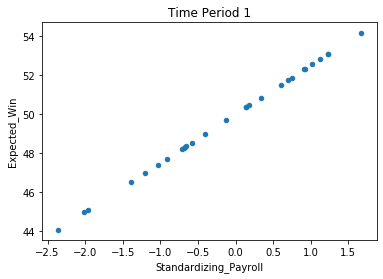

In [23]:
# This graph Illustrate how much the winning percentage differs according to the Payroll in all of the years 
ax = E_win.reset_index().plot(kind='scatter', x='Standardizing_Payroll', y='Expected_Win',
                                        title='Time Period 1')

## Effeciency

In [24]:
Effeciency = EW.copy()
Effeciency ['Effeciency'] = Effeciency['Winning_Percentage'] - Effeciency['Expected_Win']
Effeciency

,yearID,teamID,salary,totalPayroll,Winning_Percentage,Mean_Payroll,standard,Standardizing_Payroll,Expected_Win,Effeciency
0,1997,ANA,650000.0,31135472.0,51.851852,4.026021e+07,1.306073e+07,-0.698639,48.253402,3.598450
1,1998,ANA,1500000.0,41281000.0,52.469136,4.260943e+07,1.538081e+07,-0.086369,49.784077,2.685059
2,1999,ANA,2200000.0,55388166.0,43.209877,4.980762e+07,2.056133e+07,0.271410,50.678524,-7.468647
3,2000,ANA,3250000.0,51464167.0,50.617284,5.553784e+07,2.141622e+07,-0.190214,49.524464,1.092820
4,2001,ANA,4500000.0,47535167.0,46.296296,6.535544e+07,2.470771e+07,-0.721244,48.196891,-1.900595
...,...,...,...,...,...,...,...,...,...,...
853,2010,WAS,1000000.0,61400000.0,42.592593,9.071200e+07,3.811503e+07,-0.769040,48.077399,-5.484807
854,2011,WAS,1500000.0,63856928.0,49.689441,9.281684e+07,4.081197e+07,-0.709594,48.226016,1.463425
855,2012,WAS,1250000.0,80855143.0,60.493827,9.775804e+07,3.681754e+07,-0.459099,48.852252,11.641575
856,2013,WAS,1212500.0,113703270.0,53.086420,1.011509e+08,4.883029e+07,0.257062,50.642655,2.443765


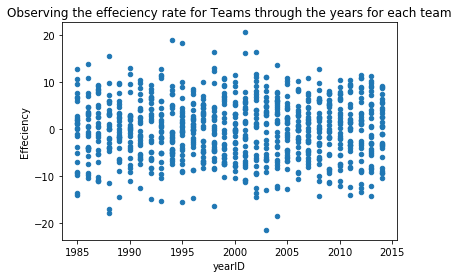

In [25]:
# This graph Illustrate how much the winning percentage differs according to the Payroll in all of the years 
ax = Effeciency.reset_index().plot(kind='scatter', x='yearID', y='Effeciency',
                                        title='Observing the effeciency rate for Teams through the years for each team')

## What About OAK ?

In [26]:
# We want to know about OAK's performance over Years. So, we select just OAK team
Effeciency_OAK = Effeciency.copy()
Effeciency_OAK = Effeciency[(Effeciency['teamID'] == "OAK")]
Effeciency_OAK

,yearID,teamID,salary,totalPayroll,Winning_Percentage,Mean_Payroll,standard,Standardizing_Payroll,Expected_Win,Effeciency
561,1985,OAK,107333.0,9058606.0,47.530864,1.007557e+07,2.470845e+06,-0.411584,48.971041,-1.440177
562,1986,OAK,1233333.0,9779421.0,46.913580,1.184056e+07,3.186956e+06,-0.646742,48.383146,-1.469566
563,1987,OAK,1353333.0,11680839.0,50.000000,1.048367e+07,3.848337e+06,0.311088,50.777720,-0.777720
564,1988,OAK,495000.0,9690000.0,64.197531,1.155586e+07,3.386331e+06,-0.550998,48.622504,15.575027
565,1989,OAK,70500.0,15613070.0,61.111111,1.384599e+07,3.568844e+06,0.495141,51.237853,9.873259
566,1990,OAK,100000.0,19887501.0,63.580247,1.707235e+07,3.771834e+06,0.746360,51.865901,11.714346
567,1991,OAK,1358333.0,36999167.0,51.851852,2.357879e+07,6.894669e+06,1.946487,54.866217,-3.014365
568,1992,OAK,1583333.0,41035000.0,59.259259,3.098244e+07,9.150607e+06,1.098568,52.746420,6.512839
569,1993,OAK,109000.0,37812333.0,41.975309,3.220500e+07,9.232485e+06,0.607348,51.518369,-9.543061
570,1994,OAK,109000.0,34172500.0,44.736842,3.313701e+07,8.528749e+06,0.121412,50.303529,-5.566687


<function matplotlib.pyplot.show(*args, **kw)>

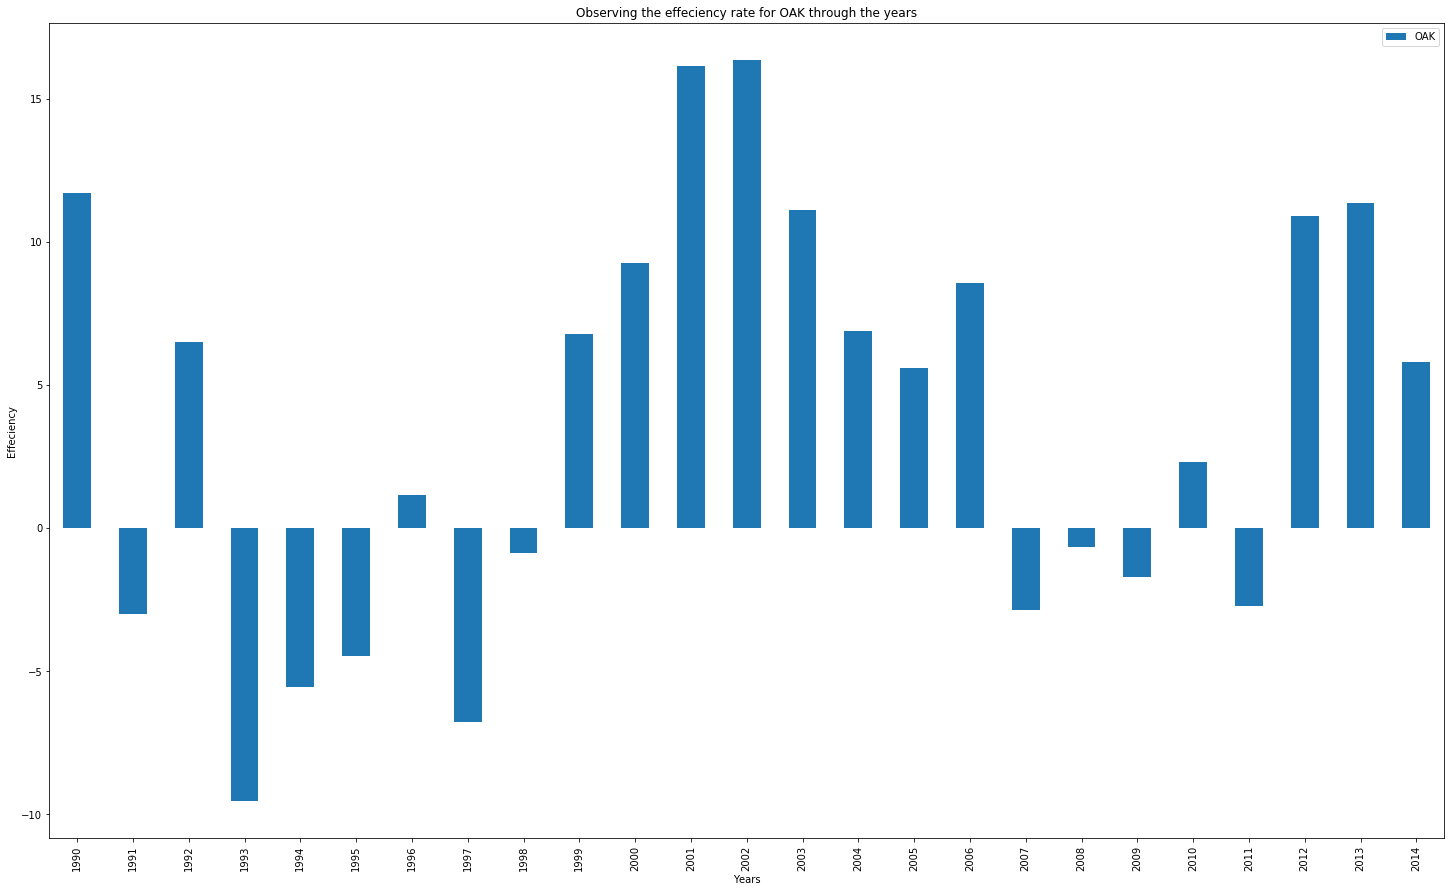

In [27]:
# Now we want to Know what's the effeciency of OAK over years by this Graph.
fig, ax = plt.subplots(figsize=(25,15))

Effeciency_OAK = Effeciency_OAK[Effeciency_OAK.yearID >= 1990]
Effeciency_OAK = Effeciency_OAK.pivot(index = 'yearID', columns = 'teamID', values = 'Effeciency')
ax = Effeciency_OAK.plot(kind='bar',title='Observing the effeciency rate for OAK through the years', ax=ax)
ax.set(xlabel="Years", ylabel= "Effeciency")
plt.legend(loc='upper right')
plt.show

## From the above graph, we notice that the effeciency of OAK reach the MAX '16' at years 2001,2002. When Billy Beane the GM used data and statistics to optimize the performace of the team.

In [28]:
#We also want to know what is the performance of all teams in year 2002- when OAK used data and statistics to optimize thier performance -
Effeciency_For_2002 = Effeciency[(Effeciency['yearID'] == 2002)]
Effeciency_For_2002

,yearID,teamID,salary,totalPayroll,Winning_Percentage,Mean_Payroll,standard,Standardizing_Payroll,Expected_Win,Effeciency
5,2002,ANA,5000000.0,61721667.0,61.111111,6.746925e+07,2.469219e+07,-0.232769,49.418077,11.693034
12,2002,ARI,5375000.0,102819999.0,60.493827,6.746925e+07,2.469219e+07,1.431657,53.579142,6.914685
42,2002,ATL,200000.0,92870367.0,62.732919,6.746925e+07,2.469219e+07,1.028710,52.571776,10.161143
72,2002,BAL,4900000.0,60493487.0,41.358025,6.746925e+07,2.469219e+07,-0.282509,49.293728,-7.935703
102,2002,BOS,1900000.0,108366060.0,57.407407,6.746925e+07,2.469219e+07,1.656265,54.140662,3.266745
144,2002,CHA,2500000.0,57052833.0,50.000000,6.746925e+07,2.469219e+07,-0.421851,48.945373,1.054627
174,2002,CHN,3550000.0,75690833.0,41.358025,6.746925e+07,2.469219e+07,0.332963,50.832407,-9.474382
204,2002,CIN,233000.0,45050390.0,48.148148,6.746925e+07,2.469219e+07,-0.907933,47.730167,0.417981
234,2002,CLE,200000.0,78909449.0,45.679012,6.746925e+07,2.469219e+07,0.463312,51.158281,-5.479269
256,2002,COL,600000.0,56851043.0,45.061728,6.746925e+07,2.469219e+07,-0.430023,48.924943,-3.863214


<function matplotlib.pyplot.show(*args, **kw)>

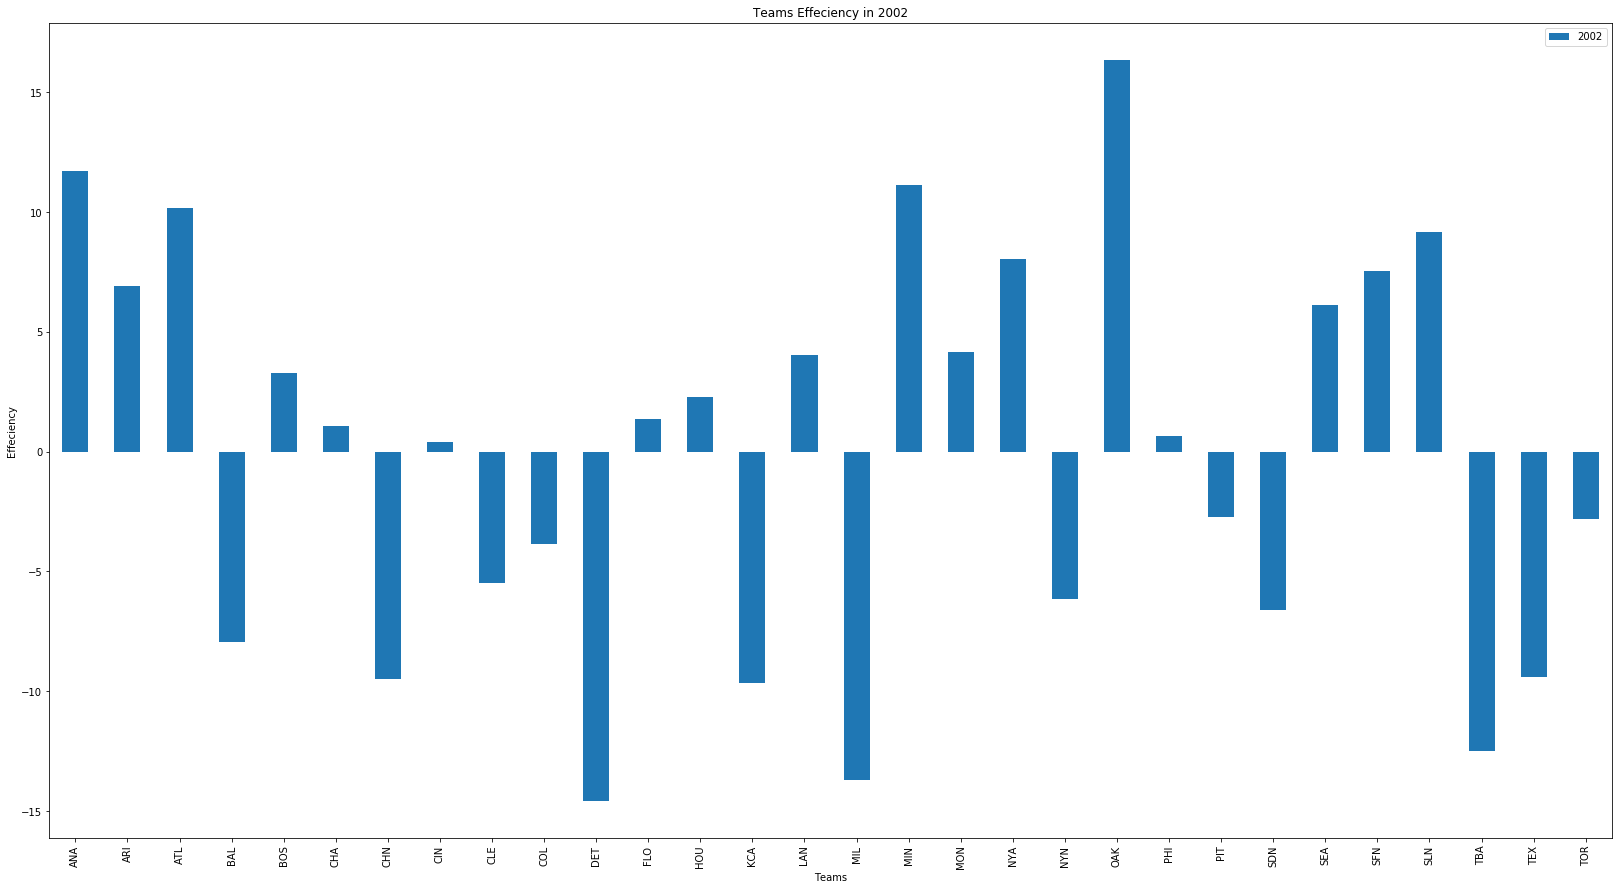

In [29]:
# Now we want to Know what's the effeciency of all teams in 2002.
fig, ax = plt.subplots(figsize=(28,15))

Effeciency_For_2002 = Effeciency_For_2002.pivot(index = 'teamID', columns = 'yearID', values = 'Effeciency')
ax = Effeciency_For_2002.plot(kind='bar',title='Teams Effeciency in 2002', ax=ax)
ax.set(xlabel="Teams", ylabel= "Effeciency")
plt.legend(loc='upper right')
plt.show

## From the above graph, we notice that the effeciency of OAK in 2002 is the MAXIMUM effeciency of all teams. Because of using data science for optimizing thier performance without paying more payrolls.